<a href="https://colab.research.google.com/github/arianza1210/ComputerVision/blob/main/bismillah_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import PIL
import os
from PIL import Image, ImageOps
import glob
import cv2

In [ ]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/MyDrive/Dataset_CNN/Dataset')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/MyDrive/Dataset_CNN/Dataset/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_raja_helena : 100
Jumlah kupu_pantat_merah : 100
Jumlah kupu_jojo : 100
Jumlah kupu_batik_cap : 100
Jumlah kupu_jarak : 100
Jumlah kupu_hijau_biru : 100
Jumlah kupu_harimau_kuning_hijau : 100
Jumlah kupu_raja_limau : 100


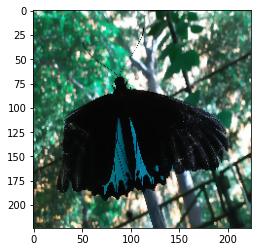

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 560 trained image filenames belonging 8 class
Found 80 validated image filenames belonging 8 class
Found 160 tested image filenames belonging 8 class


**AUGMENTASI **

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

Lenet-5 arsitektur

In [ ]:
model = Sequential() #model = sequential
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [ ]:
from tensorflow.keras.optimizers import SGD
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
epochs = 10
lrate = 0.001
adam = Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
#tanpa augmentasi
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
18/18 [==============================] - 43s 2s/step - loss: 3.6327 - accuracy: 0.2482 - val_loss: 1.4302 - val_accuracy: 0.7375
Epoch 2/10
18/18 [==============================] - 41s 2s/step - loss: 0.9023 - accuracy: 0.7607 - val_loss: 0.5383 - val_accuracy: 0.8438
Epoch 3/10
18/18 [==============================] - 41s 2s/step - loss: 0.2987 - accuracy: 0.9196 - val_loss: 0.4425 - val_accuracy: 0.8687
Epoch 4/10
18/18 [==============================] - 41s 2s/step - loss: 0.1171 - accuracy: 0.9696 - val_loss: 0.1929 - val_accuracy: 0.9563
Epoch 5/10
18/18 [==============================] - 45s 3s/step - loss: 0.0466 - accuracy: 0.9893 - val_loss: 0.1031 - val_accuracy: 0.9688
Epoch 6/10
18/18 [==============================] - 41s 2s/step - loss: 0.0136 - accuracy: 0.9946 - val_loss: 0.1600 - val_accuracy: 0.9500
Epoch 7/10
18/18 [==============================] - 41s 2s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 0.9563
Epoch 8/10
18/18 [==

In [ ]:
#dengan augmentasi
#history = model.fit(datagen.flow(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32))
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
         validation_data=datagen.flow(X_test, y_test,
         batch_size=8),epochs=epochs)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: ignored

In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

5/5 [==============================] - 3s 553ms/step - loss: 0.1122 - accuracy: 0.9750

Test accuracy: 0.9750000238418579


In [ ]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

35/35 [==============================] - 20s 582ms/step - loss: 0.1433 - accuracy: 0.9554

Train accuracy: 0.9553571343421936


In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

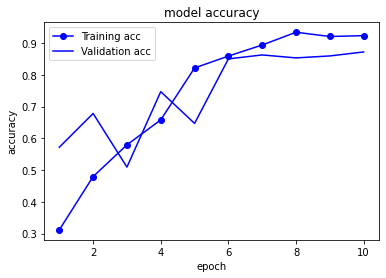

In [ ]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

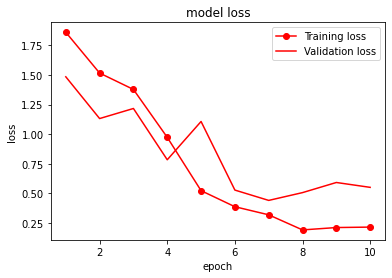

In [ ]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

prediksi data test

In [ ]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      1.00      1.00        65
         kupu_raja_helena       1.00      1.00      1.00        63
          kupu_hijau_biru       1.00      1.00      1.00        56
           kupu_batik_cap       1.00      1.00      1.00        56
               kupu_jarak       1.00      1.00      1.00        66
          kupu_raja_limau       1.00      1.00      1.00        63
                kupu_jojo       1.00      1.00      1.00        47
        kupu_pantat_merah       1.00      1.00      1.00        64

                 accuracy                           1.00       480
                macro avg       1.00      1.00      1.00       480
             weighted avg       1.00      1.00      1.00       480



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred


array([2, 1, 6, 7, 0, 2, 3, 7, 5, 3, 7, 1, 3, 4, 5, 6, 3, 7, 0, 4, 0, 6,
       3, 0, 1, 0, 7, 5, 2, 1, 4, 4, 6, 6, 5, 6, 1, 1, 4, 1, 3, 4, 3, 1,
       2, 7, 0, 6, 4, 0, 0, 6, 7, 4, 3, 0, 1, 7, 1, 5, 7, 5, 2, 6, 1, 4,
       4, 2, 1, 1, 3, 4, 2, 5, 6, 2, 3, 4, 7, 7, 0, 6, 5, 1, 3, 5, 3, 5,
       4, 7, 0, 7, 0, 6, 1, 7, 7, 2, 5, 4, 1, 7, 5, 2, 1, 7, 0, 0, 3, 2,
       3, 4, 4, 4, 4, 1, 4, 5, 5, 5, 3, 0, 2, 0, 3, 4, 7, 5, 5, 4, 6, 1,
       3, 4, 0, 3, 6, 4, 4, 2, 6, 5, 7, 4, 0, 4, 5, 4, 7, 0, 6, 7, 4, 4,
       7, 0, 4, 5, 2, 2, 6, 5, 6, 6, 2, 6, 1, 5, 4, 5, 3, 1, 5, 6, 3, 1,
       7, 6, 7, 7, 7, 2, 1, 1, 1, 7, 4, 4, 2, 3, 0, 2, 7, 0, 0, 3, 0, 2,
       0, 4, 4, 5, 5, 4, 6, 2, 0, 3, 3, 4, 0, 5, 0, 4, 5, 1, 3, 5, 1, 3,
       4, 1, 2, 5, 0, 0, 7, 4, 0, 2, 4, 7, 1, 1, 5, 5, 4, 2, 5, 5, 2, 4,
       3, 1, 2, 3, 7, 5, 4, 7, 5, 2, 6, 7, 7, 2, 1, 4, 7, 2, 6, 7, 3, 3,
       1, 3, 1, 3, 7, 2, 2, 4, 1, 7, 5, 0, 0, 5, 4, 7, 0, 0, 5, 2, 6, 5,
       0, 7, 7, 0, 1, 5, 1, 4, 7, 7, 6, 2, 4, 4, 1,

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

1.0


array([[65,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 63,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 64]])

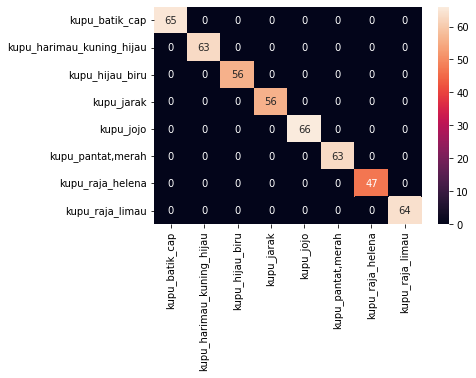

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"], 
           yticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"])

prediksi data validasi


In [ ]:
y_pred = model.predict(X_valid)
y_prediction_n = []
y_valid_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_valid[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_valid[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_valid_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_n, y_prediction_n, target_names=["Kupu Batik Cap", 
                                                                     "Kupu Harimau Kuning Hijau", "Kupu Hijau Biru", 
                                                                     "Kupu Jarak", "Kupu Jojo", "Kupu Pantat Merah", 
                                                                     "Kupu Raja Helena", "Kupu Raja Limau"]))

                           precision    recall  f1-score   support

           Kupu Batik Cap       1.00      0.95      0.97        20
Kupu Harimau Kuning Hijau       1.00      1.00      1.00        18
          Kupu Hijau Biru       0.97      1.00      0.98        29
               Kupu Jarak       0.83      0.83      0.83        18
                Kupu Jojo       0.50      1.00      0.67        14
        Kupu Pantat Merah       1.00      0.74      0.85        23
         Kupu Raja Helena       1.00      0.67      0.80        24
          Kupu Raja Limau       1.00      1.00      1.00        14

                 accuracy                           0.89       160
                macro avg       0.91      0.90      0.89       160
             weighted avg       0.93      0.89      0.89       160

